# Project-2

Detecting and classifying 'spam' and 'ham' from the given sms collection dataset using NLP(Natural Language Processing)

First import necessary libraries.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import nltk

Load data and store it after splitting in the form of list.

In [2]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
print(len(messages))

5574


In [9]:
for mess_no,message in enumerate(messages[:3]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's




In [12]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\hp\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [13]:
import pandas as pd

In [14]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

# Exploratory Data Analysis

checking all critical points in dataset.

In [15]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


here we have only two different label shown in below table.  

In [21]:
 messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [24]:
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


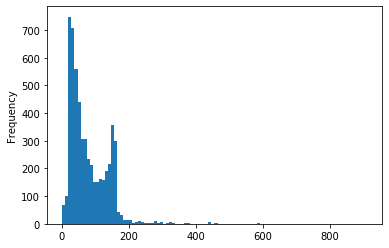

In [26]:
messages['length'].plot.hist(bins=100)

In [35]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2EA2BC148>,
      dtype=object)

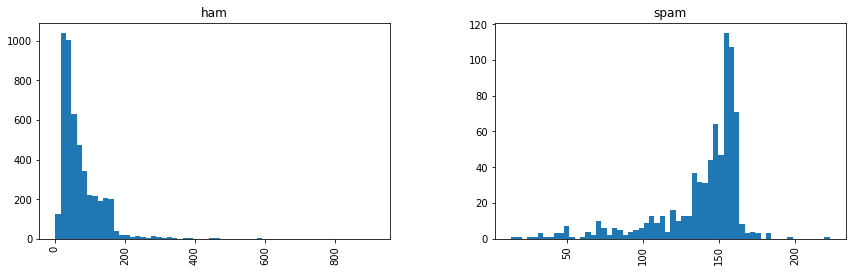

In [41]:
messages.hist(column='length', bins=60,by='label',figsize=(14,4))

# Text Pre-processing

In this section we are going to remove unexpected string from the given sentences with the help of stopwords.

In [43]:
import string

In [152]:
#Let's take one sample message for testing our models then we will fit it in required one
mess='Sample message! Notice: it has punctuation.'

In [153]:
#These are the punctuation generally encounter in any text messages, so for removing punctuation we need to use this

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [154]:
# now finding and printing the given text excluding punctuation

nopunc=[ c for c in mess if c  not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [49]:
# Stopwords are other necessary things thats to be removed from given text. So let's import it and use it
from nltk.corpus import stopwords

In [51]:
#We can see the list of words which comes under stopwords.
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
nopunc=''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [53]:
 nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [54]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [60]:
#We are creating a function consist of all steps of cleaning the text that we have performed above 

def text_process(mess):
    # remove punctuaion from the given text message
    nopunc=[char for char in mess if char  not in string.punctuation]
    
    #join the text messages which we made separate without punctuation
    nopunc=''.join(nopunc)
    
    #make out stopwords from the above joined text message aftes spliting them
    clean_mess=[ word for word in nopunc.split() if word not in stopwords.words('english')]
    
    return clean_mess

In [62]:
# We can see now after applying funtion we are left with the words which are not in punctuation and not in stopwords

messages['message'].apply(text_process).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

# Vectorization

Now after splitting all words from the text, now we have to convert them into a vector and create a vector matrix called sparse matrix, which generally have lot of zeroes into it. 

For converting the words into vector we are importing another scikit package that is Countvectoizer.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])
print(bow_transformer)

CountVectorizer(analyzer=<function text_process at 0x000001E2EA6F5B88>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [122]:
# After converting words into vector form we can see also which word is assign with which vector. 
#Now because this will be in dictionary form so it might not be in proper sequence as we expect, it is in random order

bow_transformer.vocabulary_

{'Go': 2113,
 'jurong': 7747,
 'point': 9109,
 'crazy': 5961,
 'Available': 1133,
 'bugis': 5410,
 'n': 8528,
 'great': 7129,
 'world': 11355,
 'la': 7860,
 'e': 6409,
 'buffet': 5409,
 'Cine': 1521,
 'got': 7098,
 'amore': 4845,
 'wat': 11157,
 'Ok': 3177,
 'lar': 7893,
 'Joking': 2535,
 'wif': 11264,
 'u': 10890,
 'oni': 8782,
 'Free': 1993,
 'entry': 6523,
 '2': 423,
 'wkly': 11315,
 'comp': 5811,
 'win': 11276,
 'FA': 1882,
 'Cup': 1589,
 'final': 6749,
 'tkts': 10704,
 '21st': 443,
 'May': 2896,
 '2005': 430,
 'Text': 4095,
 '87121': 871,
 'receive': 9444,
 'questionstd': 9351,
 'txt': 10878,
 'rateTCs': 9392,
 'apply': 4923,
 '08452810075over18s': 73,
 'U': 4221,
 'dun': 6396,
 'say': 9746,
 'early': 6414,
 'hor': 7378,
 'c': 5453,
 'already': 4821,
 'Nah': 3047,
 'I': 2362,
 'dont': 6315,
 'think': 10625,
 'goes': 7069,
 'usf': 10991,
 'lives': 8034,
 'around': 4969,
 'though': 10642,
 'FreeMsg': 1995,
 'Hey': 2290,
 'darling': 6056,
 '3': 543,
 'weeks': 11203,
 'word': 11342,
 

In [69]:
print(len(bow_transformer.vocabulary_))

11617


In [71]:
# Taking one message from the dataset for our analysis
mess4=messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [92]:
# By fitting our one message set into the model we can see the matrix and count of 
bow4=bow_transformer.transform([mess4])
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [82]:
bow4.shape

(1, 11617)

In [93]:
# Checking a particular vector word from the matrix
bow_transformer.get_feature_names()[9746]

'say'

In [95]:
# Transforming the whole message from the dataset into vector matrix
messages_bow=bow_transformer.transform(messages['message'])

In [97]:
print('shape of the sparse matrix:',messages_bow.shape)

shape of the sparse matrix: (5572, 11617)


In [98]:
# There are total 5572 * 11617 no. of vectors are there out of which some are non zero vectors which are given below

messages_bow.nnz

56024

In [100]:
# We can actually check what percent of the given matrix have non zero values by

sparsity=(100.0*messages_bow.nnz/(messages_bow.shape[0]*(messages_bow.shape[1])))
print('sparsity:{}'.format(sparsity))          

sparsity:0.08655038742205227


# Assigning Weightage

In this section we will assign every vector a weight which is come through some specific calculation. For doing this we are importing TfidfTransformer  from scikit.

In [101]:
from sklearn.feature_extraction.text import TfidfTransformer

In [107]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [109]:
# A message is used from the dataset 
tfidf4=tfidf_transformer.transform(bow4)

In [110]:
# Here we can see that how a particular word or vector is given weight
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [155]:
# Here a word is picked which is used in the dataset message, and we checking its idf(inverse documents frequency)
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [112]:
# Now converting the whole messages set into weightge form
messages_tfidf=tfidf_transformer.transform(messages_bow)

# Training Model

Now in this section we will train our model. We are using naive_bayes classifier for this.

In [116]:

from sklearn.naive_bayes import MultinomialNB

In [117]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [120]:
print(spam_detect_model.predict(tfidf4)[0])

ham


# Creating a Data Pipeline


Its very useful to create a pipeline, it helps to execute all set of execution and transformation one by one. By using this we can solve set of many problems. So let's import it and see the uses:

In [130]:
from sklearn.pipeline import Pipeline

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'])

In [134]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [135]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E2EA6F5B88>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [156]:
prediction=pipeline.predict(msg_test)
prediction

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [149]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(label_test,prediction))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1222
        spam       1.00      0.77      0.87       171

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.93      1393
weighted avg       0.97      0.97      0.97      1393

